In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as func

**Create a Model Class that inherits the nn.Module**


In [2]:
class Model(nn.Module):
  def __init__(self,in_features=4,h1=8,h2=9,out_features=3):
    super().__init__()
    self.fc1 = nn.Linear(in_features,h1)
    self.fc2 = nn.Linear(h1,h2)
    self.out = nn.Linear(h2,out_features)

  def forward(self,x):
    x = func.relu(self.fc1(x))
    x = func.relu(self.fc2(x))
    x = self.out(x)
    return x

In [3]:
#pick a manual seed
torch.manual_seed(41)

In [4]:
model = Model()

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
url = 'https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv'
my_df = pd.read_csv(url)
my_df

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


**Change Last Column from String to Text**

In [7]:
my_df['variety'] = my_df['variety'].replace(['Setosa','Versicolor','Virginica'],[0.0,1.0,2.0])

<ipython-input-7-f267e88eb12a>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  my_df['variety'] = my_df['variety'].replace(['Setosa','Versicolor','Virginica'],[0.0,1.0,2.0])


In [8]:
my_df

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


**Train Test Split**

In [9]:
X= my_df.drop('variety',axis=1)
y= my_df['variety']

In [10]:
X

,sepal.length,sepal.width,petal.length,petal.width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [11]:
y

,variety
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
145,2.0
146,2.0
147,2.0
148,2.0


In [12]:
#Convert X and y to Numpy Arrays
X = X.values
y = y.values

In [13]:
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [14]:
y

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.])

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=41)

In [17]:
X_test

array([[6. , 2.2, 5. , 1.5],
       [6.4, 2.8, 5.6, 2.1],
       [7.7, 3. , 6.1, 2.3],
       [6.1, 3. , 4.6, 1.4],
       [6.8, 3. , 5.5, 2.1],
       [6.1, 2.8, 4. , 1.3],
       [6.3, 2.7, 4.9, 1.8],
       [6. , 3.4, 4.5, 1.6],
       [6.5, 3. , 5.2, 2. ],
       [6.8, 3.2, 5.9, 2.3],
       [6.1, 3. , 4.9, 1.8],
       [5.1, 3.4, 1.5, 0.2],
       [4.4, 3. , 1.3, 0.2],
       [5. , 2.3, 3.3, 1. ],
       [5.1, 3.3, 1.7, 0.5],
       [6.3, 2.8, 5.1, 1.5],
       [4.8, 3.1, 1.6, 0.2],
       [6. , 2.7, 5.1, 1.6],
       [4.9, 3.6, 1.4, 0.1],
       [4.5, 2.3, 1.3, 0.3],
       [5.5, 2.4, 3.7, 1. ],
       [6.9, 3.2, 5.7, 2.3],
       [5. , 3.5, 1.6, 0.6],
       [4.7, 3.2, 1.3, 0.2],
       [5.6, 2.9, 3.6, 1.3],
       [6. , 2.2, 4. , 1. ],
       [6.3, 3.3, 4.7, 1.6],
       [5.8, 2.7, 4.1, 1. ],
       [5. , 3.3, 1.4, 0.2],
       [6.1, 2.9, 4.7, 1.4]])

In [18]:
y_test

array([2., 2., 2., 1., 2., 1., 2., 1., 2., 2., 2., 0., 0., 1., 0., 2., 0.,
       1., 0., 0., 1., 2., 0., 0., 1., 1., 1., 1., 0., 1.])

**Convert X features into float tensors and y labels into long tensors**

In [19]:
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [20]:
X_test

tensor([[6.0000, 2.2000, 5.0000, 1.5000],
        [6.4000, 2.8000, 5.6000, 2.1000],
        [7.7000, 3.0000, 6.1000, 2.3000],
        [6.1000, 3.0000, 4.6000, 1.4000],
        [6.8000, 3.0000, 5.5000, 2.1000],
        [6.1000, 2.8000, 4.0000, 1.3000],
        [6.3000, 2.7000, 4.9000, 1.8000],
        [6.0000, 3.4000, 4.5000, 1.6000],
        [6.5000, 3.0000, 5.2000, 2.0000],
        [6.8000, 3.2000, 5.9000, 2.3000],
        [6.1000, 3.0000, 4.9000, 1.8000],
        [5.1000, 3.4000, 1.5000, 0.2000],
        [4.4000, 3.0000, 1.3000, 0.2000],
        [5.0000, 2.3000, 3.3000, 1.0000],
        [5.1000, 3.3000, 1.7000, 0.5000],
        [6.3000, 2.8000, 5.1000, 1.5000],
        [4.8000, 3.1000, 1.6000, 0.2000],
        [6.0000, 2.7000, 5.1000, 1.6000],
        [4.9000, 3.6000, 1.4000, 0.1000],
        [4.5000, 2.3000, 1.3000, 0.3000],
        [5.5000, 2.4000, 3.7000, 1.0000],
        [6.9000, 3.2000, 5.7000, 2.3000],
        [5.0000, 3.5000, 1.6000, 0.6000],
        [4.7000, 3.2000, 1.3000, 0

In [21]:
y_test

tensor([2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 2, 0, 0, 1, 0, 2, 0, 1, 0, 0, 1, 2, 0, 0,
        1, 1, 1, 1, 0, 1])

**Set Criterion for measuring error ...how far the prediction value is from the actual one**

In [22]:
criterion = nn.CrossEntropyLoss()

**Set Optimizer and Learning Rate**

In [23]:
model.parameters()

<generator object Module.parameters at 0x787bd6156ce0>

In [24]:
optimizer = torch.optim.Adam(model.parameters(),lr=0.01)

**Train the Model**

In [25]:
epochs = 1000
losses = []

In [26]:
for i in range(epochs):

  #get a prediction from the forward function
  y_pred = model.forward(X_train)

  #get the loss
  loss = criterion(y_pred,y_train)

  #keep track ot the loss
  losses.append(loss.detach().numpy())

  #check every 10 epochs
  if i%10 == 0:
    print(f'Epoch: {i} Loss: {loss}')

  #back propagation
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()


Epoch: 0 Loss: 1.125203251838684
Epoch: 10 Loss: 1.0097211599349976
Epoch: 20 Loss: 0.8162347674369812
Epoch: 30 Loss: 0.585993230342865
Epoch: 40 Loss: 0.4003389775753021
Epoch: 50 Loss: 0.26794716715812683
Epoch: 60 Loss: 0.1796349585056305
Epoch: 70 Loss: 0.12165623158216476
Epoch: 80 Loss: 0.0860651507973671
Epoch: 90 Loss: 0.06522614508867264
Epoch: 100 Loss: 0.05286872014403343
Epoch: 110 Loss: 0.04508011043071747
Epoch: 120 Loss: 0.03979310765862465
Epoch: 130 Loss: 0.03596426919102669
Epoch: 140 Loss: 0.03302799537777901
Epoch: 150 Loss: 0.030512524768710136
Epoch: 160 Loss: 0.02773350290954113
Epoch: 170 Loss: 0.024612102657556534
Epoch: 180 Loss: 0.02167237363755703
Epoch: 190 Loss: 0.01932021789252758
Epoch: 200 Loss: 0.0174928717315197
Epoch: 210 Loss: 0.01604374870657921
Epoch: 220 Loss: 0.01483999565243721
Epoch: 230 Loss: 0.013800058513879776
Epoch: 240 Loss: 0.012878856621682644
Epoch: 250 Loss: 0.012144574895501137
Epoch: 260 Loss: 0.011606554500758648
Epoch: 270 Loss:

**Graph of Losses**

Text(0.5, 0, 'epoch')

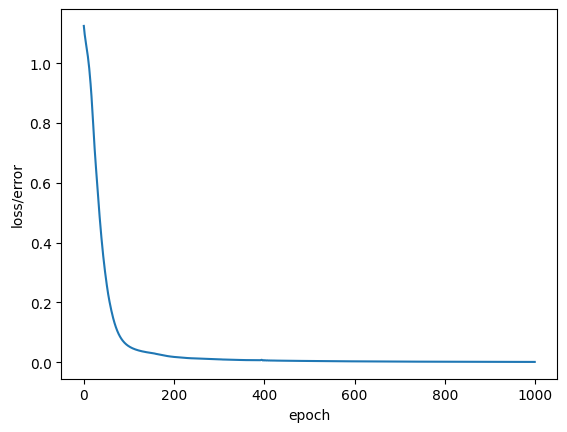

In [27]:
plt.plot(range(epochs),losses)
plt.ylabel('loss/error')
plt.xlabel('epoch')

**Evaluate the Model on the Test Data Set**

In [28]:
with torch.no_grad():
  y_eval = model.forward(X_test)
  loss = criterion(y_eval,y_test)

In [29]:
loss

tensor(0.7258)

In [30]:
flower = ['Setosa','Versicolor','Virginica']

In [31]:
correct = 0
with torch.no_grad():
  for i,data in enumerate(X_test):
    y_val = model.forward(data)
    print(f'{i+1}). {str(y_val)} \t {y_test[i]}')

    if y_val.argmax().item() == y_test[i]:
      print(f'Correct: {flower[y_val.argmax().item()]}({y_val.argmax().item()})')
      correct += 1
    else:
      print(f'Wrong: {flower[y_val.argmax().item()]}({y_val.argmax().item()})   Actual:  {flower[y_test[i]]}({y_test[i]})')

1). tensor([-10.6649,  -1.2855,  20.5699]) 	 2
Correct: Virginica(2)
2). tensor([-13.7519,  -6.1630,  30.8212]) 	 2
Correct: Virginica(2)
3). tensor([-15.8544,  -6.3233,  34.4868]) 	 2
Correct: Virginica(2)
4). tensor([ 13.5662,  26.6169, -20.1908]) 	 1
Correct: Versicolor(1)
5). tensor([-13.2983,  -3.6768,  27.4596]) 	 2
Correct: Virginica(2)
6). tensor([ 24.5100,  37.3529, -36.9165]) 	 1
Correct: Versicolor(1)
7). tensor([-8.2902,  2.1887, 16.6039]) 	 2
Correct: Virginica(2)
8). tensor([ 14.4748,  27.6771, -21.7116]) 	 1
Correct: Versicolor(1)
9). tensor([-12.0742,  -1.9638,  23.6258]) 	 2
Correct: Virginica(2)
10). tensor([-14.7158,  -6.6926,  32.9873]) 	 2
Correct: Virginica(2)
11). tensor([-5.1405,  5.5091, 11.2662]) 	 2
Correct: Virginica(2)
12). tensor([ 106.8321,   94.9895, -139.1232]) 	 0
Correct: Setosa(0)
13). tensor([  96.9599,   86.0550, -126.1875]) 	 0
Correct: Setosa(0)
14). tensor([ 29.1906,  37.9628, -42.1385]) 	 1
Correct: Versicolor(1)
15). tensor([  93.2399,   84.87

In [32]:
print(f'we got {correct} corrects')
accuracy = correct/len(y_test)
print(f'accuracy: {accuracy}')

we got 28 corrects
accuracy: 0.9333333333333333


**Test With a random Data**

In [33]:
new_iris = torch.tensor([5.9	, 3.0,	5.1	, 1.8	])

with torch.no_grad():
  print(f'{model.forward(new_iris).argmax().item()} : {flower[model.forward(new_iris).argmax().item()]}')

2 : Virginica


**Save and Load Our Neural Network Model**

In [34]:
#save
torch.save(model.state_dict(),'iris_classification_model.pt')

In [35]:
#load
new_model = Model()
new_model.load_state_dict(torch.load('iris_classification_model.pt'))
new_model.eval()

<ipython-input-35-646a55b12211>:3: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  new_model.load_state_dict(torch.load('iris_classification_model.pt'))


Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)